<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/ce_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

## **Caso de Estudio Modelo de Clasificación**

Resumen del trabajo presentado por:

- Douglas Antonio Briones Palma


## **Análisis de Datos devolución de préstamos**


El objetivo del presente trabajo es realizar una predicción sobre una base de datos de clientes que ya tienen un crédito activo y vigente, y determinar si lo pagaran o no. Para lo cual se usa una base de datos de clientes reales con algunas variables agregadas y asi darle mayor información al modelo, con el fin de tener una predicción lo mas cercana posible a la realidad.
* La variable objetivo del dataset es Pagado, donde determinaremos el estado final del credito.
* El dataset cuenta con 36 variables, 23 numéricas que se generan automáticamente desde la base de datos, y 13 variables anexadas (categóricas).

**Variables**

   * Localidad: Esta variable se refiere a la ubicación de los clientes.
   * Vivienda: Determina si el cliente tiene casa propia o renta.
   * Tercero:	Nombre del cliente(a).
   * Genero: Sexo masculino o femenino del cliente(a).
   * Educacion: Nivel escolar de los clientes.
   * Vivienda: Cliente tiene casa propia o renta.
   * Empleado: determina si cliente es empleado o dueño de negocio.
   * Dependientes: ¿cuántos hijos están a su cargo?.
   * Casado/a: solo tiene 2 estados si/no.
   * Documento: número de documento o ID
   * Fecha_credito: dia que se entrega el crédito.
   * Fecha_vence: dia que se vence el plazo del crédito.
   * Plazo: cantidad de dias disponibles para pagar el crédito.
   * Monto: cantidad en dinero aprobada para desembolso.
   * REEST_PAGO0 a REEST_PAGO5: retraso en el pago del crédito (-1: pago debidamente, 1: tardó un mes, 2: tardó 2 meses, etc).
   * SALDAT0 a SALDAT5: monto prestado por mes (SALDAT0: mes pasado, SALDAT1:hace 2 meses, etc)
   * CUOTA1 a CUOTA5: cuotas pagadas en meses anteriores.
   * outcome: muestra si ha pagado o no, según el historico.
   * Historial: récord de pago interno para determinar categoria de clientes.
   * Estado: situacion en que se encuentra un crédito. (activo/inactivo)
   * Categoria: vigencia del credito (vigente/ vencido)
   * Pagado: cancelación total del crédito otorgado (si/no)

    

## **Librerías**

##**Instalando librerías necesarias**

In [1]:
!pip install pycaret

## **Habilitando librerias necesarias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import figure
%matplotlib inline

## **Conjunto de Datos**

In [3]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/Prediccion_Bluefields_final.csv"

In [4]:
# Creación del dataframe (en todas las celdas de código que se requieran)
clientes = pd.read_csv(url)
clientes.head(5)

,Localidad,Tercero,Genero,Educacion,Vivienda,Empleado,Dependientes,Casado/a,Documento,Fecha_credito,...,CUOTA2,CUOTA3,CUOTA4,CUOTA5,CUOTA6,outcome,Historial,Estado,Categoria,Pagado
0,Bluefields,IRIS YORLENE CHAMORRO URBINA,MUJER,Secundaria,Propia,No,3,NO,BEF-1000146,18/06/2021,...,689.0,0.0,0.0,0.0,0.0,1.0,1.00,Inactivo,Vencido,Si
1,Bluefields,XIOMARA YESSELL PADILLA CORONADA,MUJER,Secundaria,Propia,No,3,SI,BEF-1000225,5/7/2021,...,1000.0,1000.0,1000.0,0.0,2000.0,1.0,0.72,Activo,Vencido,No
2,Bluefields,PAULINA DEL CARMEN FERNANDEZ MURILLO,MUJER,Secundaria,Propia,No,5,SI,BEF-1000347,27/07/2021,...,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,0.61,Activo,Vencido,Si
3,Bluefields,RIGOBERTO GREGORIO GONZALEZ UGARTE,HOMBRE,Secundaria,Propia,No,1,SI,BEF-1000797,21/08/2021,...,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,0.69,Activo,Vencido,No
4,Bluefields,KATHERINE ISELA LINARTE SANDOVAL,MUJER,Secundaria,Propia,No,4,SI,BEF-1001059,28/08/2021,...,36681.0,10000.0,9000.0,689.0,679.0,0.0,0.51,Activo,Vencido,Si


## **Análisis Exploratorio**

In [5]:
clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependientes,270.0,2.877778,1.380920,1.00,2.00,3.000,4.00,5.0
Plazo,270.0,31.562963,6.225750,23.00,30.00,30.000,30.00,50.0
Monto,270.0,163274.629630,133563.149492,6900.00,50000.00,130000.000,240000.00,630000.0
RET_PAGO0,268.0,0.033582,1.050589,-2.00,-1.00,0.000,1.00,3.0
RET_PAGO2,268.0,-0.160448,1.186852,-2.00,-1.00,0.000,0.00,5.0
RET_PAGO3,268.0,-0.119403,1.208861,-2.00,-1.00,0.000,0.00,4.0
RET_PAGO4,268.0,-0.261194,1.066543,-2.00,-1.00,0.000,0.00,4.0
RET_PAGO5,268.0,-0.212687,1.109842,-2.00,-1.00,0.000,0.00,5.0
RET_PAGO6,268.0,-0.279851,1.157958,-2.00,-1.00,0.000,0.00,6.0
IMPFACT,268.0,49664.052239,73041.530951,-2000.00,3991.75,19578.500,59603.25,422069.0


In [6]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Localidad      270 non-null    object 
 1   Tercero        270 non-null    object 
 2   Genero         270 non-null    object 
 3   Educacion      270 non-null    object 
 4   Vivienda       270 non-null    object 
 5   Empleado       270 non-null    object 
 6   Dependientes   270 non-null    int64  
 7   Casado/a       270 non-null    object 
 8   Documento      270 non-null    object 
 9   Fecha_credito  270 non-null    object 
 10  Fecha_vence    270 non-null    object 
 11  Plazo          270 non-null    int64  
 12  Monto          270 non-null    int64  
 13  RET_PAGO0      268 non-null    float64
 14  RET_PAGO2      268 non-null    float64
 15  RET_PAGO3      268 non-null    float64
 16  RET_PAGO4      268 non-null    float64
 17  RET_PAGO5      268 non-null    float64
 18  RET_PAGO6 

## Eliminamos columna Documentos porque no se requiere

In [7]:
del clientes['Documento']
del clientes['Localidad']
del clientes['Tercero']
del clientes['outcome']

In [8]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genero         270 non-null    object 
 1   Educacion      270 non-null    object 
 2   Vivienda       270 non-null    object 
 3   Empleado       270 non-null    object 
 4   Dependientes   270 non-null    int64  
 5   Casado/a       270 non-null    object 
 6   Fecha_credito  270 non-null    object 
 7   Fecha_vence    270 non-null    object 
 8   Plazo          270 non-null    int64  
 9   Monto          270 non-null    int64  
 10  RET_PAGO0      268 non-null    float64
 11  RET_PAGO2      268 non-null    float64
 12  RET_PAGO3      268 non-null    float64
 13  RET_PAGO4      268 non-null    float64
 14  RET_PAGO5      268 non-null    float64
 15  RET_PAGO6      268 non-null    float64
 16  IMPFACT        268 non-null    float64
 17  IMPFACT2       268 non-null    float64
 18  IMPFACT3  

### Cambiamos tipo de datos de fecha y convertimos variables descriptivas en numericas

In [9]:
clientes["Fecha_credito"] = pd.to_datetime(clientes.Fecha_credito, infer_datetime_format=True)
clientes["Fecha_vence"] = pd.to_datetime(clientes.Fecha_vence, infer_datetime_format=True)
clientes['Casado/a']= (clientes['Casado/a'].map({'SI': 1, 'NO': 0}))
clientes['Genero'] = (clientes['Genero'].map({'MUJER':0, 'HOMBRE':1}))
clientes['Educacion'] = (clientes['Educacion'].map({'Primaria':1, 'Secundaria':2,'Universidad':3}))
clientes['Vivienda'] = (clientes['Vivienda'].map({'Propia': 1, 'Renta': 2}))
clientes['Pagado'] = (clientes['Pagado'].map({'Si': 1, 'No': 0}))
clientes['Empleado'] = (clientes['Empleado'].map({'Si': 1, 'No': 0}))

In [10]:
clientes.head(5)

,Genero,Educacion,Vivienda,Empleado,Dependientes,Casado/a,Fecha_credito,Fecha_vence,Plazo,Monto,...,CUOTA1,CUOTA2,CUOTA3,CUOTA4,CUOTA5,CUOTA6,Historial,Estado,Categoria,Pagado
0,0,2,1,0,3,0,2021-06-18,2021-07-23,30,20000,...,0.0,689.0,0.0,0.0,0.0,0.0,1.00,Inactivo,Vencido,1
1,0,2,1,0,3,1,2021-07-05,2021-08-01,23,120000,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.72,Activo,Vencido,0
2,0,2,1,0,5,1,2021-07-27,2021-08-23,23,90000,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.61,Activo,Vencido,1
3,1,2,1,0,1,1,2021-08-21,2021-09-24,30,50000,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.69,Activo,Vencido,0
4,0,2,1,0,4,1,2021-08-28,2021-10-01,30,50000,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.51,Activo,Vencido,1


### Verificamos que no hayan valores nulos

In [11]:
clientes.isnull().sum().sort_values(ascending=False)

IMPFACT          2
RET_PAGO2        2
IMPFACT4         2
IMPFACT3         2
IMPFACT2         2
CUOTA1           2
RET_PAGO6        2
RET_PAGO5        2
RET_PAGO4        2
RET_PAGO3        2
RET_PAGO0        2
IMPFACT6         2
CUOTA2           2
CUOTA3           2
CUOTA4           2
CUOTA5           2
CUOTA6           2
IMPFACT5         2
Historial        0
Estado           0
Categoria        0
Genero           0
Educacion        0
Monto            0
Plazo            0
Fecha_vence      0
Fecha_credito    0
Casado/a         0
Dependientes     0
Empleado         0
Vivienda         0
Pagado           0
dtype: int64

### Imputamos valores nulos en el dataset

In [12]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(clientes[["IMPFACT"]])
clientes["IMPFACT"] = imputer.transform(clientes[["IMPFACT"]]).ravel()


In [13]:
clientes['RET_PAGO2'].fillna(clientes['RET_PAGO2'].mean(), inplace=True)
clientes['RET_PAGO0'].fillna(clientes['RET_PAGO0'].mean(), inplace=True)
clientes['CUOTA2'].fillna(clientes['CUOTA2'].mean(), inplace=True)
clientes['IMPFACT4'].fillna(clientes['IMPFACT4'].mean(), inplace=True)
clientes['IMPFACT3'].fillna(clientes['IMPFACT3'].mean(), inplace=True)
clientes['IMPFACT2'].fillna(clientes['IMPFACT2'].mean(), inplace=True)
clientes['CUOTA1'].fillna(clientes['CUOTA1'].mean(), inplace=True)
clientes['RET_PAGO6'].fillna(clientes['RET_PAGO6'].mean(), inplace=True)
clientes['RET_PAGO5'].fillna(clientes['RET_PAGO5'].mean(), inplace=True)
clientes['RET_PAGO4'].fillna(clientes['RET_PAGO4'].mean(), inplace=True)
clientes['RET_PAGO3'].fillna(clientes['RET_PAGO3'].mean(), inplace=True)
clientes['IMPFACT5'].fillna(clientes['IMPFACT5'].mean(), inplace=True)
clientes['IMPFACT6'].fillna(clientes['IMPFACT6'].mean(), inplace=True)
clientes['CUOTA3'].fillna(clientes['CUOTA3'].mean(), inplace=True)
clientes['CUOTA4'].fillna(clientes['CUOTA4'].mean(), inplace=True)
clientes['CUOTA5'].fillna(clientes['CUOTA5'].mean(), inplace=True)
clientes['CUOTA6'].fillna(clientes['CUOTA6'].mean(), inplace=True)


In [14]:
clientes.isnull().sum().sort_values(ascending=False)

Genero           0
Educacion        0
Categoria        0
Estado           0
Historial        0
CUOTA6           0
CUOTA5           0
CUOTA4           0
CUOTA3           0
CUOTA2           0
CUOTA1           0
IMPFACT6         0
IMPFACT5         0
IMPFACT4         0
IMPFACT3         0
IMPFACT2         0
IMPFACT          0
RET_PAGO6        0
RET_PAGO5        0
RET_PAGO4        0
RET_PAGO3        0
RET_PAGO2        0
RET_PAGO0        0
Monto            0
Plazo            0
Fecha_vence      0
Fecha_credito    0
Casado/a         0
Dependientes     0
Empleado         0
Vivienda         0
Pagado           0
dtype: int64

### Mostramos los datos de creditos pagados

In [15]:
print(clientes.value_counts(clientes['Pagado'], sort = True))

Pagado
1    143
0    127
dtype: int64


In [16]:
ptraining = clientes.sample(frac=0.80, random_state=786)
ptraining

,Genero,Educacion,Vivienda,Empleado,Dependientes,Casado/a,Fecha_credito,Fecha_vence,Plazo,Monto,...,CUOTA1,CUOTA2,CUOTA3,CUOTA4,CUOTA5,CUOTA6,Historial,Estado,Categoria,Pagado
196,0,2,2,1,1,0,2022-07-21,2022-08-25,30,150000,...,0.0,0.0,116.0,0.0,1500.0,0.0,0.26,Activo,Vigente,0
126,0,3,1,1,5,0,2022-08-16,2022-09-20,30,200000,...,3568.0,3585.0,3602.0,3848.0,3669.0,3784.0,1.00,Inactivo,Vigente,1
35,0,3,2,0,1,1,2022-07-01,2022-08-05,30,160000,...,131.0,396.0,396.0,565.0,792.0,0.0,0.21,Activo,Vencido,0
213,0,1,2,1,1,1,2022-07-27,2022-08-31,30,30000,...,3036.0,2309.0,0.0,1000.0,2000.0,148.0,0.64,Activo,Vigente,0
56,0,1,1,0,1,0,2022-07-22,2022-08-26,30,180000,...,8500.0,1500.0,7500.0,679.0,9000.0,2000.0,0.47,Activo,Vigente,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0,3,2,1,5,1,2022-06-27,2022-08-01,30,500000,...,5006.0,31178.0,3180.0,0.0,5293.0,768.0,0.37,Activo,Vencido,1
172,0,2,2,1,2,1,2022-07-06,2022-08-10,30,50000,...,15000.0,1000.0,149.0,0.0,5000.0,10000.0,0.46,Activo,Vencido,0
17,0,3,2,0,4,0,2022-03-14,2022-05-11,50,320000,...,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0.67,Activo,Vencido,0
3,1,2,1,0,1,1,2021-08-21,2021-09-24,30,50000,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.69,Activo,Vencido,0


In [17]:
ptesteo = clientes.drop(ptraining.index)
ptesteo

,Genero,Educacion,Vivienda,Empleado,Dependientes,Casado/a,Fecha_credito,Fecha_vence,Plazo,Monto,...,CUOTA1,CUOTA2,CUOTA3,CUOTA4,CUOTA5,CUOTA6,Historial,Estado,Categoria,Pagado
4,0,2,1,0,4,1,2021-08-28,2021-10-01,30,50000,...,2000.000000,36681.00000,10000.000000,9000.000000,689.000000,679.000000,0.51,Activo,Vencido,1
5,1,2,2,0,1,1,2021-09-03,2021-10-08,30,50000,...,2500.000000,1815.00000,657.000000,1000.000000,1000.000000,800.000000,0.20,Activo,Vencido,0
11,1,2,2,1,1,1,2021-11-03,2021-12-08,30,260000,...,21818.000000,9966.00000,8583.000000,22301.000000,0.000000,3640.000000,0.60,Activo,Vencido,1
19,1,3,2,0,2,0,2022-03-25,2022-04-29,30,180000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.17,Activo,Vencido,1
20,1,3,2,0,5,0,2022-03-28,2022-05-02,30,130000,...,3000.000000,1537.00000,1000.000000,2000.000000,930.000000,33764.000000,0.30,Activo,Vencido,0
22,1,3,2,0,5,1,2022-05-03,2022-05-30,23,70000,...,2007.000000,3582.00000,0.000000,3601.000000,0.000000,1820.000000,0.91,Activo,Vencido,1
23,1,3,2,0,2,1,2022-05-05,2022-06-09,30,450000,...,19428.000000,1473.00000,560.000000,0.000000,0.000000,1128.000000,0.26,Activo,Vencido,1
39,1,3,2,1,3,1,2022-07-12,2022-08-16,30,280000,...,9075.000000,0.00000,9976.000000,8000.000000,9525.000000,781.000000,0.41,Activo,Vencido,1
46,0,2,2,0,3,1,2022-07-16,2022-08-19,30,20000,...,3000.000000,0.00000,16741.000000,334.000000,0.000000,0.000000,0.30,Activo,Vigente,0
48,1,2,2,0,2,1,2022-07-19,2022-08-23,30,380000,...,21540.000000,15138.00000,24677.000000,11851.000000,11875.000000,8251.000000,0.29,Activo,Vigente,0


In [18]:
clientes.reset_index(inplace=True, drop=True)
ptesteo.reset_index(inplace=True, drop=True)
print('Datos para entrenar: ' + str(ptraining.shape))
print('Datos para predecir: ' + str(ptesteo.shape))

Datos para entrenar: (216, 32)
Datos para predecir: (54, 32)


# Analisis de Distribucion de las Variables

<ipython-input-19-4cfeebc492b9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ptraining.drop(['Fecha_credito','Fecha_vence','RET_PAGO0','RET_PAGO5','RET_PAGO6','CUOTA1','CUOTA2','CUOTA3',


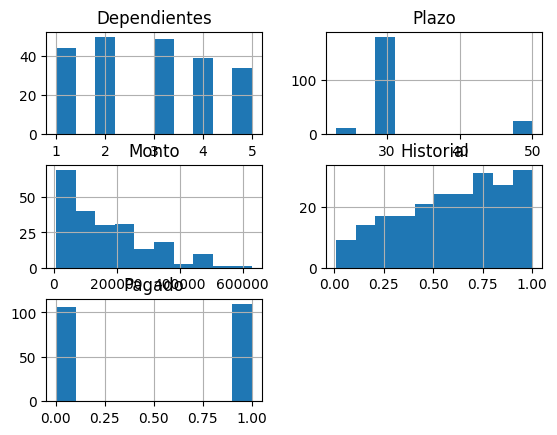

In [19]:
ptraining.drop(['Fecha_credito','Fecha_vence','RET_PAGO0','RET_PAGO5','RET_PAGO6','CUOTA1','CUOTA2','CUOTA3',
               'CUOTA4','CUOTA5','CUOTA6','RET_PAGO2','RET_PAGO3','RET_PAGO4','Empleado',
               'Genero','Educacion', 'Vivienda','Casado/a','IMPFACT','IMPFACT2','IMPFACT3',
               'IMPFACT4','IMPFACT5','IMPFACT6'],1).hist()

for i in ptraining.columns:
  fig = px.histogram(ptraining,
               x = i,
               template="gridon",
               nbins=40)

  fig.update_layout(bargap=0.2)
  fig.show()


# Analizamos correlación entre las variables

<ipython-input-20-0e3847adc82b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



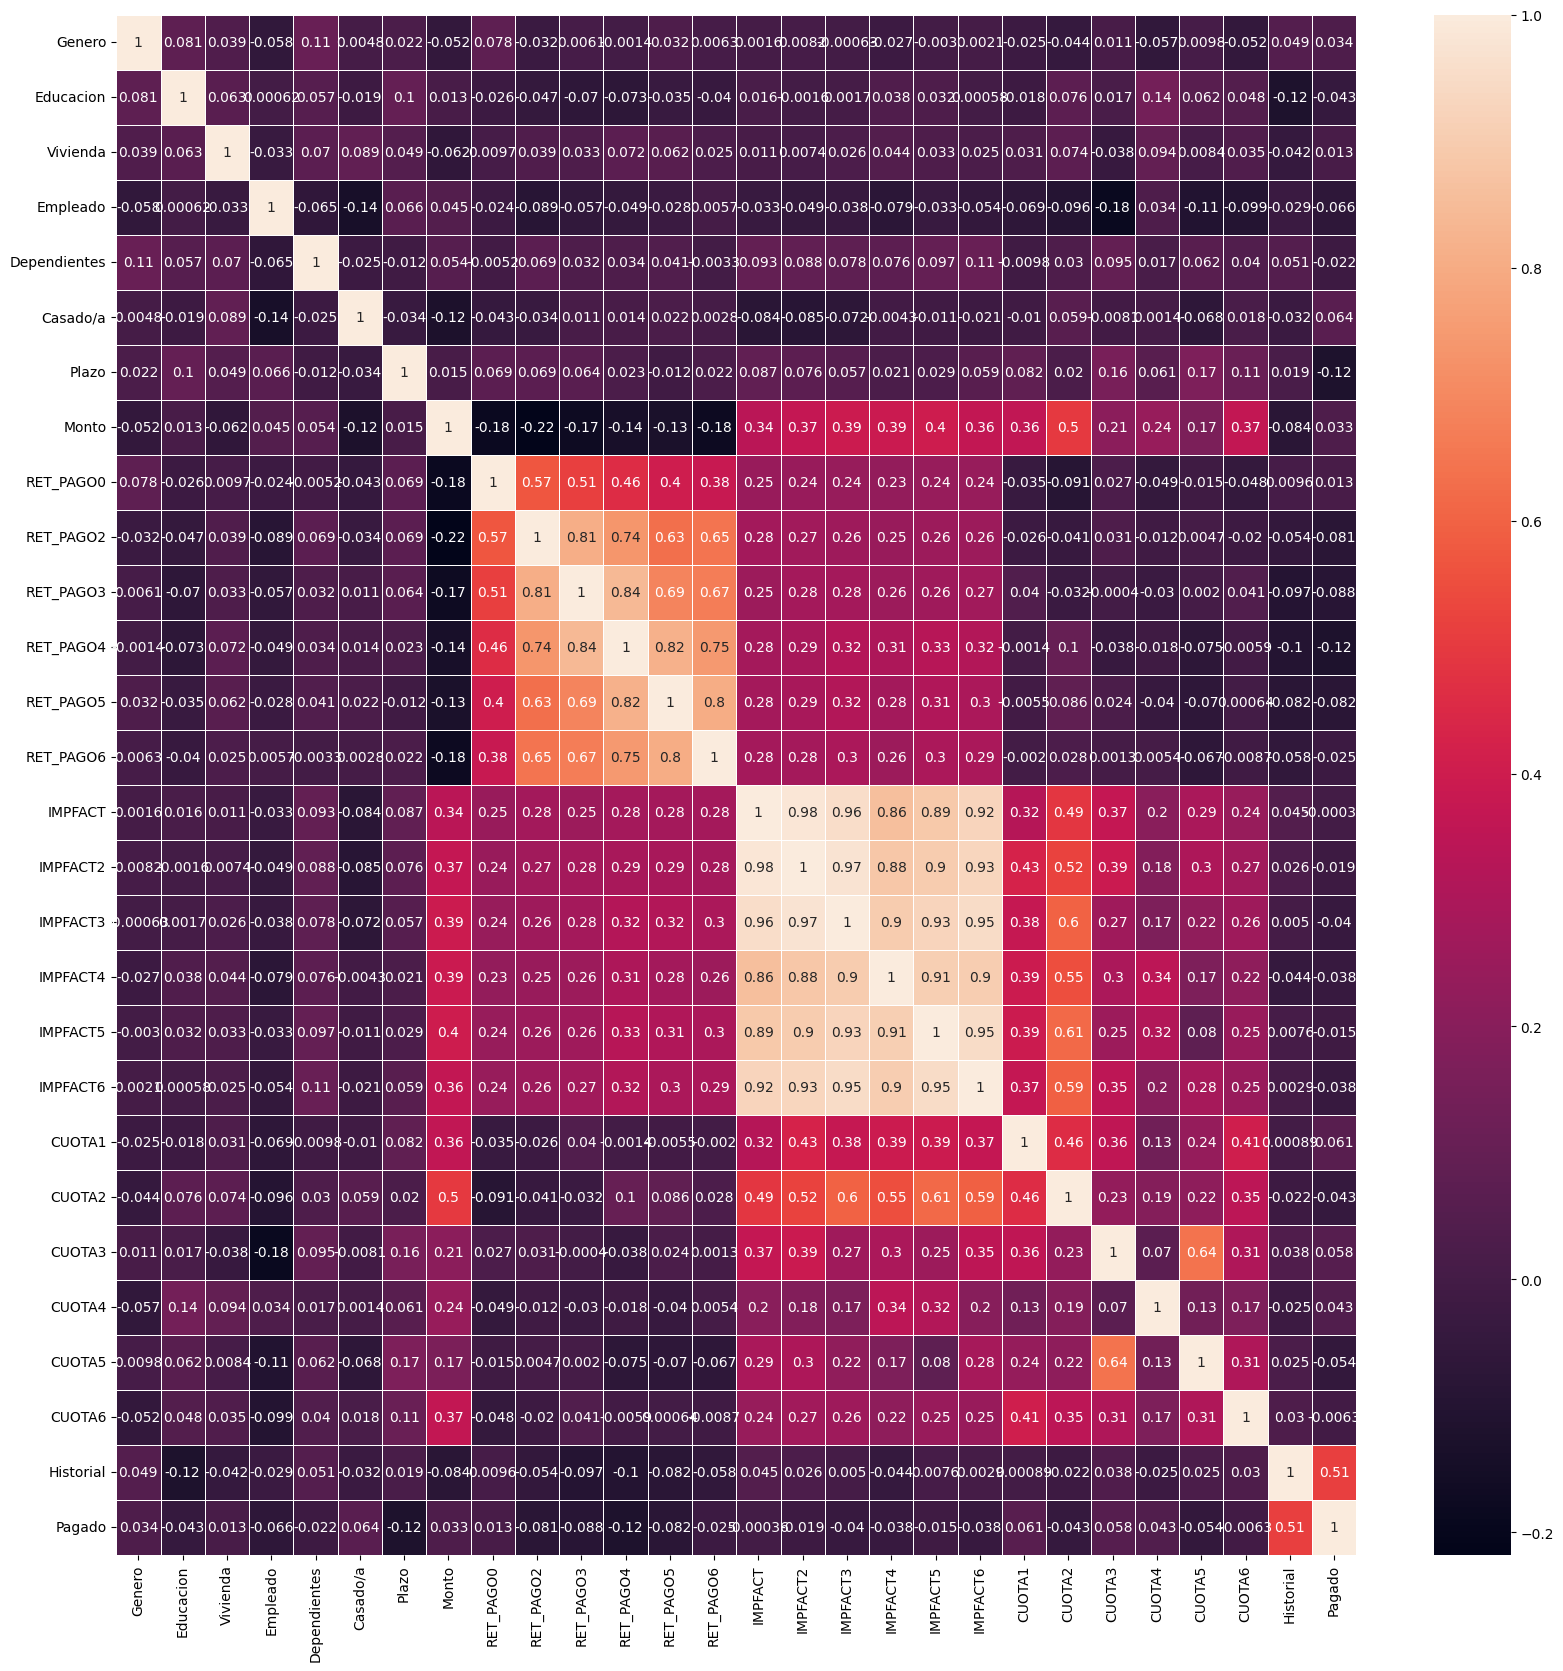

In [20]:
corr = ptraining.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.show()

In [21]:
corr = ptraining.corr(method='pearson', numeric_only=True)
px.imshow(corr,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

##**Configuración de PyCaret**

In [22]:
# Configurando PyCaret para trabajar (en todas las celdas de código que se requieran)
from pycaret.classification import *

##**Creación del modelo**

In [23]:
modelo = setup(data = ptraining, target = 'Pagado', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Pagado
2,Target type,Binary
3,Original data shape,"(216, 32)"
4,Transformed data shape,"(216, 36)"
5,Transformed train set shape,"(151, 36)"
6,Transformed test set shape,"(65, 36)"
7,Ordinal features,2
8,Numeric features,27
9,Date features,2


In [24]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8412,0.8391,0.7661,0.9135,0.8232,0.6834,0.7020,0.2050
ada,Ada Boost Classifier,0.8408,0.8464,0.8179,0.8692,0.8336,0.6822,0.6950,0.4740
rf,Random Forest Classifier,0.8350,0.8181,0.7643,0.9096,0.8172,0.6699,0.6938,0.3060
gbc,Gradient Boosting Classifier,0.8346,0.8500,0.7786,0.8892,0.8178,0.6708,0.6879,0.2830
xgboost,Extreme Gradient Boosting,0.8079,0.8304,0.7643,0.8485,0.7944,0.6161,0.6289,0.3780
dt,Decision Tree Classifier,0.7558,0.7545,0.7357,0.7767,0.7414,0.5100,0.5244,0.2540
et,Extra Trees Classifier,0.7221,0.7852,0.6857,0.7580,0.7107,0.4434,0.4536,0.3340
ridge,Ridge Classifier,0.7146,0.0000,0.7304,0.7231,0.7182,0.4300,0.4449,0.1300
lda,Linear Discriminant Analysis,0.6883,0.7500,0.7304,0.6909,0.7006,0.3798,0.3949,0.1910
qda,Quadratic Discriminant Analysis,0.6083,0.6335,0.4179,0.7245,0.5017,0.2274,0.2596,0.1940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#**Creación del Modelo**

In [25]:
mtraining = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8906,0.7500,0.8571,0.8000,0.6250,0.6299
1,0.8667,0.9821,0.8750,0.8750,0.8750,0.7321,0.7321
2,0.8000,0.7857,0.7500,0.8571,0.8000,0.6018,0.6071
3,0.9333,0.8929,1.0000,0.8889,0.9412,0.8649,0.8729
4,0.9333,0.9643,0.8750,1.0000,0.9333,0.8673,0.8750
5,0.7333,0.6071,0.5000,1.0000,0.6667,0.4828,0.5641
6,0.8000,0.7857,0.6250,1.0000,0.7692,0.6087,0.6614
7,0.8667,0.9821,0.8571,0.8571,0.8571,0.7321,0.7321
8,0.7333,0.6429,0.5714,0.8000,0.6667,0.4545,0.4725


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

##**Optimización del modelo (no obligatoria)...**

In [26]:
optimizado = tune_model(mtraining)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.8125,0.7500,1.0000,0.8571,0.7500,0.7746
1,0.8667,0.9821,0.8750,0.8750,0.8750,0.7321,0.7321
2,0.8667,0.8036,0.7500,1.0000,0.8571,0.7368,0.7638
3,0.9333,0.9464,1.0000,0.8889,0.9412,0.8649,0.8729
4,0.9333,0.9464,0.8750,1.0000,0.9333,0.8673,0.8750
5,0.6667,0.5179,0.3750,1.0000,0.5455,0.3590,0.4677
6,0.8000,0.8393,0.6250,1.0000,0.7692,0.6087,0.6614
7,0.9333,0.9464,0.8571,1.0000,0.9231,0.8649,0.8729
8,0.7333,0.6071,0.5714,0.8000,0.6667,0.4545,0.4725


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


##**Evaluación del modelo**

In [27]:
evaluate_model(optimizado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Datos de la matriz de confusión**

* Acurracy o exactitud: habilidad de predecir correctamente cada clase.
* Precisión: mide que tan preciso se clasifican verdaderos positivos.
* Recall: que tan bueno es para encontrar todos los positivos.
* F1:( promedio de precision y recall para clases desbalanceadas)



##**Predicción del modelo**

In [28]:
predict_model(optimizado)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7385,0.8314,0.5455,0.9000,0.6792,0.4800,0.5231


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


,Genero,Educacion,Vivienda,Empleado,Dependientes,Casado/a,Fecha_credito,Fecha_vence,Plazo,Monto,...,CUOTA3,CUOTA4,CUOTA5,CUOTA6,Historial,Estado,Categoria,Pagado,prediction_label,prediction_score
177,0,2,1,1,3,1,2022-07-09,2022-08-12,30,50000,...,1000.0,2000.0,0.0,2000.0,0.28,Activo,Vencido,0,0,0.6453
204,0,2,2,1,3,0,2022-07-23,2022-08-26,30,360000,...,5800.0,5600.0,5600.0,4100.0,0.48,Activo,Vigente,0,0,0.6558
166,0,2,2,1,5,1,2022-06-23,2022-07-28,30,370000,...,15413.0,4792.0,13453.0,4699.0,0.61,Activo,Vencido,1,0,0.6140
165,0,2,1,1,1,1,2022-06-22,2022-08-19,50,110000,...,3000.0,2900.0,3000.0,2800.0,0.06,Activo,Vigente,0,0,0.6005
76,0,3,1,1,4,1,2022-07-29,2022-09-02,30,50000,...,320.0,500.0,1000.0,1000.0,0.53,Activo,Vigente,0,0,0.6372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,1,3,2,0,3,0,2022-03-21,2022-04-25,30,360000,...,0.0,0.0,0.0,0.0,0.28,Activo,Vencido,0,0,0.6055
172,0,2,2,1,2,1,2022-07-06,2022-08-10,30,50000,...,149.0,0.0,5000.0,10000.0,0.46,Activo,Vencido,0,0,0.6424
64,0,2,2,0,2,1,2022-07-25,2022-08-29,30,130000,...,0.0,2353.0,0.0,0.0,0.73,Activo,Vigente,0,0,0.6678
198,0,2,1,1,3,0,2022-07-21,2022-08-25,30,500000,...,1251.0,1206.0,1151.0,15816.0,0.56,Activo,Vigente,0,0,0.6211


#**Finalizamos el modelo**

In [29]:
modelo_final = finalize_model(optimizado)

##**imprimimos el modelo**

In [30]:
print(modelo_final)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None,
                                    include=['Fecha_credito', 'Fecha_vence'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Genero', 'Educacion', 'Vivienda',
                                             'Empleado', 'Dependientes',
                                             'Casa...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.7,
                                importance_type='split', lear

##**Guardamos el modelo**

In [31]:
save_model(modelo_final,'Modelo final Creditos')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None,
                                     include=['Fecha_credito', 'Fecha_vence'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Genero', 'Educacion', 'Vivienda',
                                              'Empleado', 'Dependientes',
                                              'Casa...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.7,
                                 importance_typ

#**Leyendo el modelo**

In [32]:
modelo_guardado = load_model('Modelo final Creditos')

Transformation Pipeline and Model Successfully Loaded


#**nueva predicción**

In [33]:
novistos = predict_model(modelo_final, data=ptesteo)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7037,0.7835,0.6061,0.8696,0.7143,0.4263,0.4567


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


In [34]:
novistos.head()

,Genero,Educacion,Vivienda,Empleado,Dependientes,Casado/a,Fecha_credito,Fecha_vence,Plazo,Monto,...,CUOTA3,CUOTA4,CUOTA5,CUOTA6,Historial,Estado,Categoria,Pagado,prediction_label,prediction_score
0,0,2,1,0,4,1,2021-08-28,2021-10-01,30,50000,...,10000.0,9000.0,689.0,679.0,0.51,Activo,Vencido,1,0,0.6079
1,1,2,2,0,1,1,2021-09-03,2021-10-08,30,50000,...,657.0,1000.0,1000.0,800.0,0.20,Activo,Vencido,0,0,0.5828
2,1,2,2,1,1,1,2021-11-03,2021-12-08,30,260000,...,8583.0,22301.0,0.0,3640.0,0.60,Activo,Vencido,1,1,0.5014
3,1,3,2,0,2,0,2022-03-25,2022-04-29,30,180000,...,0.0,0.0,0.0,0.0,0.17,Activo,Vencido,1,0,0.6918
4,1,3,2,0,5,0,2022-03-28,2022-05-02,30,130000,...,1000.0,2000.0,930.0,33764.0,0.30,Activo,Vencido,0,0,0.6015


#**Conclusiones**
Se realizo varias pruebas con diferentes subidivisiones de entrenamiento/testeo del dataframe y segun el porcentaje asignado (70/30, 80/20, 90/10)cambia el modelo con mejores caracteristicas.

Para efectos de ejemplo se uso la subdivision 80/20 y el modelo aplicado con mejores caracteristicas fue lightgbm. Al optimizar el modelo mejora en Accuracy pero en Recall baja significativamente aunque al momento de clasificar no tiene tanto impacto por el volumen del dataframe y porque esta bastante balanceado

El proposito de implementar este modelo de prediccion es para facilitar al sistema la toma de decisiones en base a informacion de campo y en tiempo real.

Se determino una fuerte consideracion de la variable "Historial", "IMPFACT6", "Monto" para determinar si un cliente va a pagar o no, un credito vigente.

En datos no vistos la precision del modelo mejora en un poco mas de un 2%, lo que quiere decir que clasifica mejor las clases, pero en cuanto al Recall disminuye la cantidad de datos identificados.

El modelo llena en gran manera las expectativas de prediccion para aplicarlo en el ambito laboral de la empresa.

Gracias por su atencion.